# DSC540 Project 3

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, recall_score, precision_score, balanced_accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

In [153]:
pd.set_option('display.max_columns', 100)
RANDOM_STATE = 0

## Q1 [10]
- Read in the dataset
- How many rows and variables are there?
- What is the average value of AP for those points who have CO levels above 3 $mg/m^3$?
- Create a correlation map between the variables. Which variables have high correlation (> |0.9|)?
- Create a scatter plot of 'TEY' vs 'CDP'
- Create histograms for CO and NOX.
- Create a sctter plot of CO vs NOX.

In [155]:
df = pd.read_csv("C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Advanced Machine Learning\\DSC 540 - Week 6\\Data File\\gas_emissions.csv")


In [156]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [157]:
df.shape

(7384, 11)

In [158]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [159]:
df_CO = df[df["CO"] > 3]
avg_value = (df_CO["AP"].mean())
print(f"A. The Average value is {avg_value}.")

A. The Average value is 1015.690017349063.


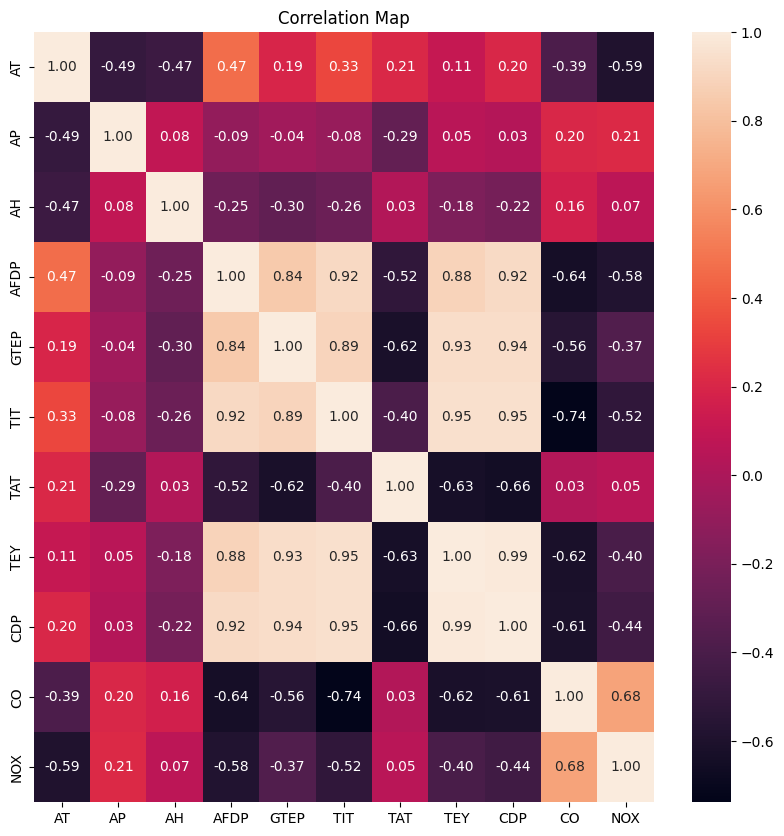

In [160]:
corr = df.corr()

plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True, fmt = ".2f")
plt.title("Correlation Map")
plt.show()

In [161]:
high_correlated_vars = corr.stack().loc[(corr.stack() > 0.9) & (corr.stack() < 1) |
                                        (corr.stack() < -0.9) & (corr.stack() > -1)]

print(f"The variables that have high correlation are like below:\n{high_correlated_vars}")

The variables that have high correlation are like below:
AFDP  TIT     0.915128
      CDP     0.922991
GTEP  TEY     0.932337
      CDP     0.938142
TIT   AFDP    0.915128
      TEY     0.951813
      CDP     0.951590
TEY   GTEP    0.932337
      TIT     0.951813
      CDP     0.991207
CDP   AFDP    0.922991
      GTEP    0.938142
      TIT     0.951590
      TEY     0.991207
dtype: float64


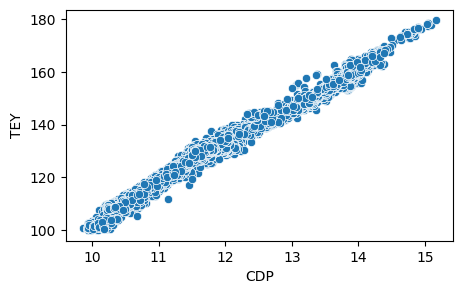

In [162]:
plt.figure(figsize = (5, 3))
plt.scatter(df["CDP"], df["TEY"], edgecolors = 'white', linewidths = 0.5)
plt.xlabel("CDP")
plt.ylabel("TEY")
plt.show()

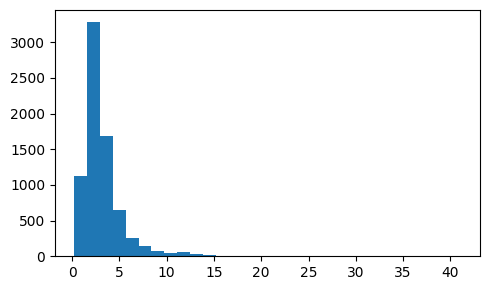

In [163]:
plt.figure(figsize = (5, 3))  
plt.hist(df['CO'], bins = 30)
plt.tight_layout()  
plt.show()

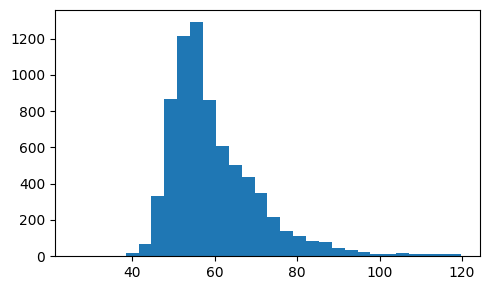

In [164]:
plt.figure(figsize = (5, 3))  
plt.hist(df['NOX'], bins = 30)
plt.tight_layout()  
plt.show()

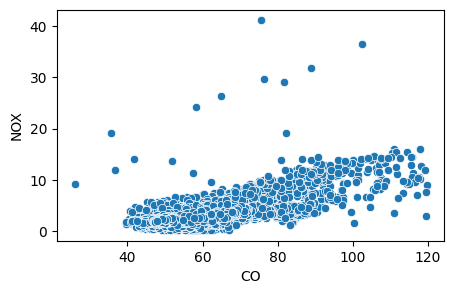

In [165]:
plt.figure(figsize = (5, 3))
plt.scatter(df["NOX"], df["CO"], edgecolors = 'white', linewidths = 0.5)
plt.xlabel("CO")
plt.ylabel("NOX")
plt.show()

### Prepare data for machine learning

In [166]:
y = df.CO
X = df.drop(['CO', 'NOX'], axis = 1)

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state = RANDOM_STATE)

In [168]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() # Standardization of the data
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [169]:
X_train.shape

(5316, 9)

In [170]:
X_val.shape

(1329, 9)

In [171]:
X_test.shape

(739, 9)

## Q2 [10]

- Apply Linear Regression. Predict CO emission using other variables.
    - What is the model $R^2$ on training data?
    - What is the $R^2$ on validation data?
    - What is the Root Mean Squared Error (RMSE) on training data?
    - What is the RMSE on validation data?

In [172]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() # Initialize the model
lr.fit(X_train, y_train) # Fit the model
lr_pred_train = lr.predict(X_train) # Predict the target values
lr_pred_val = lr.predict(X_val) # Predict the target values

In [175]:
print(f"The R-Squared value on the training data is {r2_score(y_train, lr_pred_train):.3f}")
print(f"The R-Squared value on the validation data is {r2_score(y_val, lr_pred_val):.3f}")
print(f"The RMSE value on the training data is {np.sqrt(mean_squared_error(y_train, lr_pred_train)):.3f}")
print(f"The RMSE value on the validation data is {np.sqrt(mean_squared_error(y_val, lr_pred_val)):.3f}")

The R-Squared value on the training data is 0.664
The R-Squared value on the validation data is 0.646
The RMSE value on the training data is 1.272
The RMSE value on the validation data is 1.388


## Q3 [10]

- Apply Random Forest Regression with 100 trees. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

- Is training and validation score close? If not what might be the problem?
- If there is a large gap, try to decrease the gap by changing some hyperparameters of the Random Forest model. (In this analysis, any difference more than 0.10 $R^2$ difference can be assumed to be large.)

In [176]:
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor(n_estimators = 100, random_state = RANDOM_STATE)  # Initialize the model
estimator.fit(X_train, y_train) # Fit the model
rfr_pred_train = estimator.predict(X_train) # Predict the target values
rfr_pred_val = estimator.predict(X_val) # Predict the target values

In [179]:
print(f"The R-Squared value on the training data is {r2_score(y_train, rfr_pred_train):.3f}")
print(f"The R-Squared value on the validation data is {r2_score(y_val, rfr_pred_val):.3f}")
print(f"The RMSE value on the training data is {np.sqrt(mean_squared_error(y_train, rfr_pred_train)):.3f}")
print(f"The RMSE value on the validation data is {np.sqrt(mean_squared_error(y_val, rfr_pred_val)):.3f}")

The R-Squared value on the training data is 0.964
The R-Squared value on the validation data is 0.756
The RMSE value on the training data is 0.419
The RMSE value on the validation data is 1.154


A. There is a large gap between training and validation score. This discrepancy indicates that the model is likely overfitting to the training data. 

In [180]:
estimator = RandomForestRegressor(n_estimators = 100, random_state = RANDOM_STATE) # Initialize the model

# Define the hyperparameters
hyperparameters_rfr = {'max_depth': [3, 5, 10],
                        'min_samples_split': [2, 3, 5],
                        'min_samples_leaf': [1, 2, 4],
                        'max_features': ['auto', 'sqrt', 'log2']}

grid_search_rfr = GridSearchCV(estimator = estimator, param_grid = hyperparameters_rfr, cv = 5) # Set up the grid search
grid_search_rfr.fit(X_train, y_train) # Fit the grid search
print(f"The best hyper parameters are {grid_search_rfr.best_params_}.")

c:\Users\wodnj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodnj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodnj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\wodnj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py"

The best hyper parameters are {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}.


In [181]:
# Define a random forest regressor with hyperparameters
rfr_with_hyperparameters = RandomForestRegressor(n_estimators = 100,
                                                 max_depth = 10,
                                                 min_samples_split = 2,
                                                 min_samples_leaf = 4,
                                                 max_features = 'sqrt',
                                                 random_state = RANDOM_STATE)
rfr_with_hyperparameters.fit(X_train, y_train) # Fit the model
rfr_pred_train = rfr_with_hyperparameters.predict(X_train)  # Predict the target values
rfr_pred_val = rfr_with_hyperparameters.predict(X_val) # Predict the target values

In [182]:
print(f"The R-Squared value on the training data is {r2_score(y_train, rfr_pred_train):.3f}")
print(f"The R-Squared value on the validation data is {r2_score(y_val, rfr_pred_val):.3f}")
print("The gap between training and validation R-squared values reached less than 0.10.")

The R-Squared value on the training data is 0.850
The R-Squared value on the validation data is 0.760
The gap between training and validation R-squared values reached less than 0.10.


## Q4 [10]

- Apply Support Vector Regression. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Do this for each of the models listed below using the default parameters:  
    1. **Linear kernel SVR**  
    2. **Polynomial kernel SVR**  
    3. **RBF kernel SVR** 

### Linear SVM Regressor

In [ ]:
from sklearn.svm import SVR

estimator = SVR(kernel = 'linear') # Initialize the model
estimator.fit(X_train, y_train) # Fit the model
linear_svr_pred_train = estimator.predict(X_train) # Predict the target values
linear_svr_pred_val = estimator.predict(X_val) # Predict the target values

In [186]:
print(f"The R-Squared value on the training data is {r2_score(y_train, linear_svr_pred_train):.3f}")
print(f"The R-Squared value on the validation data is {r2_score(y_val, linear_svr_pred_val):.3f}")
print(f"The RMSE value on the training data is {np.sqrt(mean_squared_error(y_train, linear_svr_pred_train)):.3f}")
print(f"The RMSE value on the validation data is {np.sqrt(mean_squared_error(y_val, linear_svr_pred_val)):.3f}")

The R-Squared value on the training data is 0.624
The R-Squared value on the validation data is 0.602
The RMSE value on the training data is 1.345
The RMSE value on the validation data is 1.473


### Polynomial Kernel SVM Regressor

In [187]:
from sklearn.svm import SVR

estimator = SVR(kernel = 'poly') # Initialize the model
estimator.fit(X_train, y_train) # Fit the model
polynomial_svr_pred_train = estimator.predict(X_train) # Predict the target values
polynomial_svr_pred_val = estimator.predict(X_val) # Predict the target values

In [189]:
print(f"The R-Squared value on the training data is {r2_score(y_train, polynomial_svr_pred_train):.3f}")
print(f"The R-Squared value on the validation data is {r2_score(y_val, polynomial_svr_pred_val):.3f}")
print(f"The RMSE value on the training data is {np.sqrt(mean_squared_error(y_train, polynomial_svr_pred_train)):.3f}")
print(f"The RMSE value on the validation data is {np.sqrt(mean_squared_error(y_val, polynomial_svr_pred_val)):.3f}")

The R-Squared value on the training data is 0.740
The R-Squared value on the validation data is 0.731
The RMSE value on the training data is 1.118
The RMSE value on the validation data is 1.211


### RBF Kernel SVM Regressor

In [190]:
from sklearn.svm import SVR

estimator = SVR(kernel = 'rbf') # Initialize the model
estimator.fit(X_train, y_train) # Fit the model
rbf_svr_pred_train = estimator.predict(X_train) # Predict the target values
rbf_svr_pred_val = estimator.predict(X_val) # Predict the target values

In [192]:
print(f"The R-Squared value on the training data is {r2_score(y_train, rbf_svr_pred_train):.3f}")
print(f"The R-Squared value on the validation data is {r2_score(y_val, rbf_svr_pred_val):.3f}")
print(f"The RMSE value on the training data is {np.sqrt(mean_squared_error(y_train, rbf_svr_pred_train)):.3f}")
print(f"The RMSE value on the validation data is {np.sqrt(mean_squared_error(y_val, rbf_svr_pred_val)):.3f}")

The R-Squared value on the training data is 0.765
The R-Squared value on the validation data is 0.748
The RMSE value on the training data is 1.063
The RMSE value on the validation data is 1.173


### Q5 [10]

- Take RBF Kernel SVM and perform hyperparameter tuning. See if you can increase the $R^2$ score.   
    - Use:  
          'C': [1, 10, 100, 1000]
          'gamma': [0.001, 0.01, 0.1, 1]  

    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

In [194]:
estimator = SVR(kernel = 'rbf') # Initialize the model

# Define the hyperparameters
hyperparameters_rbf_svr = {"C": [1, 10, 100, 1000],
                           "gamma": [0.001, 0.01, 0.1, 1]}

grid_search_rbf_svr = GridSearchCV(estimator = estimator, param_grid = hyperparameters_rbf_svr, cv = 5, scoring = "r2")  # Set up the grid search
grid_search_rbf_svr.fit(X_train, y_train) # Fit the grid search

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='r2')

In [195]:
best_rbf_svr = grid_search_rbf_svr.best_estimator_ # Retrieve the best model found by the grid search
rbf_svr_pred_train = best_rbf_svr.predict(X_train) # Predict the target values
rbf_svr_pred_val = best_rbf_svr.predict(X_val) # Predict the target values

In [196]:
print(f"Best parameters: {grid_search_rbf_svr.best_params_}")
print(f"The R-Squared value on the training data is {r2_score(y_train, rbf_svr_pred_train):.3f}")
print(f"The R-Squared value on the validation data is {r2_score(y_val, rbf_svr_pred_val):.3f}")
print(f"The RMSE value on the training data is {np.sqrt(mean_squared_error(y_train, rbf_svr_pred_train)):.3f}")
print(f"The RMSE value on the validation data is {np.sqrt(mean_squared_error(y_val, rbf_svr_pred_val)):.3f}")

Best parameters: {'C': 1000, 'gamma': 0.01}
The R-Squared value on the training data is 0.792
The R-Squared value on the validation data is 0.757
The RMSE value on the training data is 1.000
The RMSE value on the validation data is 1.151


A. Increasing the R-Squared value is observed with hyperparameter tuning.

## Q6 [10]

- Apply PCA and transform the data. 

- Use the PCA transformed data to perform regression. Use the models: 
    - Linear Regression
    - Random Forest Regression (Optional to do hyper parameter tuning)
    - RBF Kernel Support Vector Regression (Optional to do hyper parameter tuning)
  
- For each model:  
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Compare these models with their counterparts obtained before. Do you observe any change in performance? Please explain. 


In [197]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None) # Initialize PCA object

In [198]:
pca.fit(X_train)  # Fit the model

# Transform the data
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

[0.58158952 0.78924196 0.88751722 0.94337792 0.98704348 0.9959942
 0.99975821 0.99992456 1.        ]


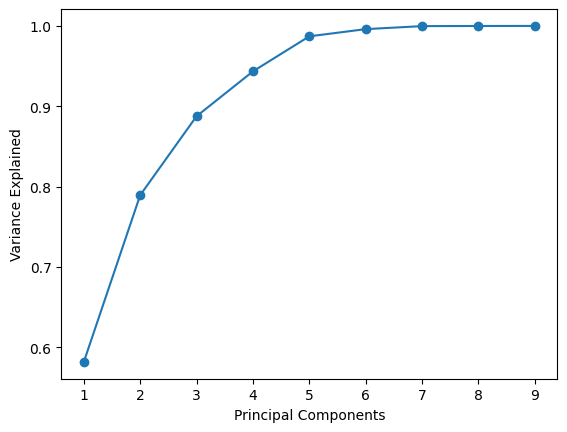

In [199]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels = [i + 1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

In [200]:
X_train_pca2 = X_train_pca[:, 0:5]
X_val_pca2 = X_val_pca[:, 0:5]
X_test_pca2 = X_test_pca[:, 0:5]

### 1. Linear Regression with PCA transformed data

In [201]:
lr_pca = LinearRegression() # Initialize the model
lr_pca.fit(X_train_pca2, y_train) # Fit the model
lr_pca_pred_train = lr_pca.predict(X_train_pca2) # Predict the target values
lr_pca_pred_val = lr_pca.predict(X_val_pca2) # Predict the target values

In [202]:
print(f"The R-Squared value on the training data is {r2_score(y_train, lr_pca_pred_train):.3f}")
print(f"The R-Squared value on the validation data is {r2_score(y_val, lr_pca_pred_val):.3f}")
print(f"The RMSE value on the training data is {np.sqrt(mean_squared_error(y_train, lr_pca_pred_train)):.3f}")
print(f"The RMSE value on the validation data is {np.sqrt(mean_squared_error(y_val, lr_pca_pred_val)):.3f}")

The R-Squared value on the training data is 0.656
The R-Squared value on the validation data is 0.633
The RMSE value on the training data is 1.287
The RMSE value on the validation data is 1.414


### 2. RF Regression with PCA transformed data

In [203]:
# Initialize the model with hyperparameters
rfr_pca = RandomForestRegressor(n_estimators = 100,
                                max_depth = 10,
                                min_samples_split = 2,
                                min_samples_leaf = 4,
                                max_features = 'sqrt',
                                random_state = RANDOM_STATE)
rfr_pca.fit(X_train_pca2, y_train) # Fit the model
rfr_pca_pred_train = rfr_pca.predict(X_train_pca2) # Predict the target values
rfr_pca_pred_val = rfr_pca.predict(X_val_pca2) # Predict the target values

In [204]:
print(f"The R-Squared value on the training data is {r2_score(y_train, rfr_pca_pred_train):.3f}")
print(f"The R-Squared value on the validation data is {r2_score(y_val, rfr_pca_pred_val):.3f}")
print(f"The RMSE value on the training data is {np.sqrt(mean_squared_error(y_train, rfr_pca_pred_train)):.3f}")
print(f"The RMSE value on the validation data is {np.sqrt(mean_squared_error(y_val, rfr_pca_pred_val)):.3f}")

The R-Squared value on the training data is 0.836
The R-Squared value on the validation data is 0.744
The RMSE value on the training data is 0.889
The RMSE value on the validation data is 1.181


### 3. SVM Regression with PCA transformed data

In [205]:
# Initialize the model with hyperparameters
rbf_svr_pca = SVR(kernel = 'rbf',
                  C = 1000,
                  gamma = 0.01)
rbf_svr_pca.fit(X_train_pca2, y_train) # Fit the model
rbf_svr_pca_pred_train = rbf_svr_pca.predict(X_train_pca2) # Predict the target values
rbf_svr_pca_pred_val = rbf_svr_pca.predict(X_val_pca2) # Predict the target values

In [206]:
print(f"The R-Squared value on the training data is {r2_score(y_train, rbf_svr_pca_pred_train):.3f}")
print(f"The R-Squared value on the validation data is {r2_score(y_val, rbf_svr_pca_pred_val):.3f}")
print(f"The RMSE value on the training data is {np.sqrt(mean_squared_error(y_train, rbf_svr_pca_pred_train)):.3f}")
print(f"The RMSE value on the validation data is {np.sqrt(mean_squared_error(y_val, rbf_svr_pca_pred_val)):.3f}")

The R-Squared value on the training data is 0.785
The R-Squared value on the validation data is 0.752
The RMSE value on the training data is 1.017
The RMSE value on the validation data is 1.163


**Linear Regression**
- R-Squared Value Without PCA
    - Training: 0.664
    - Validation: 0.646
- R-Squared Value With PCA
    - Training: 0.656
    - Validation: 0.633

**Random Forest Regression**
- R-Squared Value Without PCA
    - Training: 0.850
    - Validation: 0.760
- R-Squared Value With PCA
    - Training: 0.836
    - Validation: 0.744

**RBF Kernel Support Vectior Regression**
- R-Squared Value Without PCA
    - Training: 0.792
    - Validation: 0.757
- R-Squared Value With PCA
    - Training: 0.785
    - Validation: 0.752

A. Based on the R-Squared differences of each model, it is hard to say that PCA affected change in performance.

## Q7 [10]

### Fit RBF Kernel SVM Classifier

#### 1. Standardized training data 
- Using the standardized training data perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set:
     - Create confusion matrix
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
     

#### 2. PCA transformed training data 
- Using the **pca** transformed training data `X_train_pca2` perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set `X_val_pca2`:
         - Create confusion matrix
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score


In [207]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold = 3) # Initialize Binarizer object

In [209]:
# Binarize the target variables
y_train_cat = binarizer.transform(y_train.values.reshape(-1, 1)).ravel()
y_val_cat = binarizer.transform(y_val.values.reshape(-1, 1)).ravel()
y_test_cat = binarizer.transform(y_test.values.reshape(-1, 1)).ravel()

In [212]:
from sklearn.svm import SVC

estimator = SVC(kernel = 'rbf') # Initialize the model


#### SVC Model 1 

In [214]:
# Define the hyperparameters
hyperparameters_rbf_svr = {"C": [1, 10, 100, 1000],
                           "gamma": [0.001, 0.01, 0.1, 1]}

grid_search_rbf_svr1 = GridSearchCV(estimator = estimator, param_grid = hyperparameters_rbf_svr, cv = 5, scoring = "accuracy") # Set up the grid search
grid_search_rbf_svr1.fit(X_train, y_train_cat) # Fit the grid search

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [215]:
best_rbf_svr1 = grid_search_rbf_svr1.best_estimator_ # Retrieve the best model found by the grid search
rbf_svr_pred_val1 = best_rbf_svr1.predict(X_val) # Predict the target values

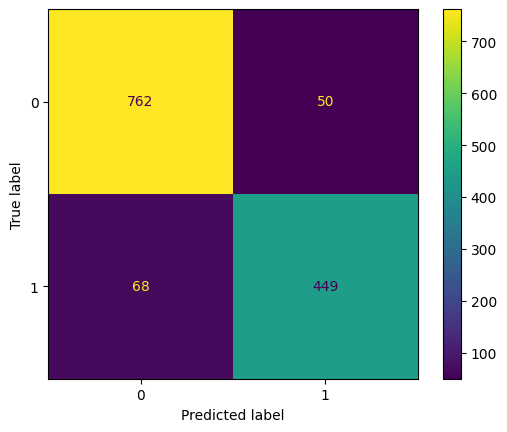

In [216]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val_cat, rbf_svr_pred_val1)

# Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
display.plot()


In [217]:
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print(f"Recall: {recall_score(y_val_cat, rbf_svr_pred_val1):.2f}")
print(f"Specificity: {specificity:.3f}")
print(f"Precision: {precision_score(y_val_cat, rbf_svr_pred_val1):.2f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_val_cat, rbf_svr_pred_val1):.2f}")
print(f"F1 Score: {f1_score(y_val_cat, rbf_svr_pred_val1):.2f}")

Recall: 0.87
Specificity: 0.938
Precision: 0.90
Balanced Accuracy: 0.90
F1 Score: 0.88


#### SVC Model 2

In [218]:
# Define the hyperparameters
hyperparameters_rbf_svr = {"C": [1, 10, 100, 1000],
                           "gamma": [0.001, 0.01, 0.1, 1]}

grid_search_rbf_svr2 = GridSearchCV(estimator = estimator, param_grid = hyperparameters_rbf_svr, cv = 5, scoring = "accuracy") # Set up the grid search
grid_search_rbf_svr2.fit(X_train_pca2, y_train_cat) # Fit the grid search

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [219]:
best_rbf_svr2 = grid_search_rbf_svr2.best_estimator_ # Retrieve the best model found by the grid search
rbf_svr_pred_val2 = best_rbf_svr2.predict(X_val_pca2) # Predict the target values

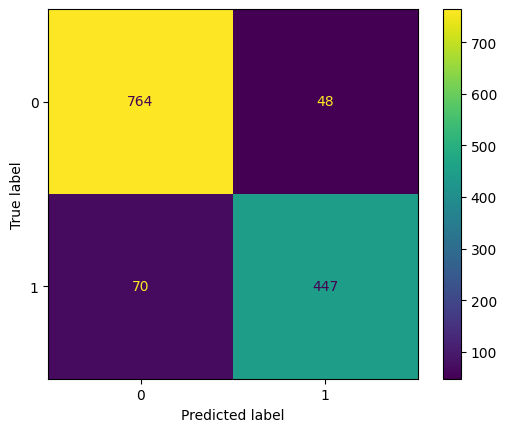

In [220]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val_cat, rbf_svr_pred_val2)

# Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
display.plot()

In [221]:
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print(f"Recall: {recall_score(y_val_cat, rbf_svr_pred_val2):.2f}")
print(f"Specificity: {specificity:.3f}")
print(f"Precision: {precision_score(y_val_cat, rbf_svr_pred_val2):.2f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_val_cat, rbf_svr_pred_val2):.2f}")
print(f"F1 Score: {f1_score(y_val_cat, rbf_svr_pred_val2):.2f}")

Recall: 0.86
Specificity: 0.941
Precision: 0.90
Balanced Accuracy: 0.90
F1 Score: 0.88


## Q8 [10]

- For regression:
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

### 0. Original Model

In [222]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() # Initialize the model
lr.fit(X_train, y_train) # Fit the model
lr_pred_val = lr.predict(X_val) # Predict the target values

In [224]:
print(f"The R-Squared value on the validation data is {r2_score(y_val, lr_pred_val):.3f}")
print(f"The RMSE value on the validation data is {np.sqrt(mean_squared_error(y_val, lr_pred_val)):.3f}")

The R-Squared value on the validation data is 0.646
The RMSE value on the validation data is 1.388


### 1. Feature Engineering

In [225]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression

In [226]:
# Initialize PolynomialFeatures object
poly = PolynomialFeatures(degree = 2)

# Transform the features to polynomial features
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

In [227]:
# Initialize SelectKBest object
k_best = SelectKBest(score_func = f_regression, k = 20)

# Transform the features
X_train_selected = k_best.fit_transform(X_train_poly, y_train)
X_val_selected = k_best.transform(X_val_poly)


In [228]:
lr = LinearRegression() # Initialize the model
lr.fit(X_train_selected, y_train) # Fit the model
lr_pred_val = lr.predict(X_val_selected) # Predict the target values

In [229]:
print(f"The R-Squared value on the validation data is {r2_score(y_val, lr_pred_val):.3f}")
print(f"The RMSE value on the validation data is {np.sqrt(mean_squared_error(y_val, lr_pred_val)):.3f}")

The R-Squared value on the validation data is 0.735
The RMSE value on the validation data is 1.202


### 2. Lasso Regularization

In [230]:
from sklearn.linear_model import Lasso

lasso = Lasso() # Initialize the model

In [232]:
# Define the hyperparameters
hyperparameters_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid_search_lasso = GridSearchCV(estimator = lasso, param_grid = hyperparameters_lasso, cv = 5, scoring = "neg_mean_squared_error") # Set up the grid search
grid_search_lasso.fit(X_train, y_train) # Fit the grid search

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [233]:
best_lasso = grid_search_lasso.best_estimator_ # Retrieve the best model found by the grid search
best_lasso.fit(X_train, y_train) # Fit the model
lasso_pred_val1 = best_lasso.predict(X_val) # Predict the target values

In [234]:
print(f"The R-Squared value on the validation data is {r2_score(y_val, lasso_pred_val1):.3f}")
print(f"The RMSE value on the validation data is {np.sqrt(mean_squared_error(y_val, lasso_pred_val1)):.3f}")

The R-Squared value on the validation data is 0.642
The RMSE value on the validation data is 1.397


**Original Model Performance**
- R-Squared: 0.646
- RMSE: 1.388

**Model Performance With Feature Engineering**
- R-Squared: 0.735
- RMSE: 1.202

**Model Performance With Lasso Regularization**
- R-Squared: 0.642
- RMSE: 1.397


The validation performance has increased after applying feature engineering. On the other hand, it appears the slight decrease in R-Squared and increase in RMSE with Lasso regularization. This demonstrates that applying feature engineering is better way of improving the regression performance on this validation dataset.

## Q9 [10]

- For classification:
    - Try at least one classifier other than SVM (RF, GBM, Logistic Regression, etc). 
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

### 0. Original Model

In [235]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42) # Initialize the model
rf.fit(X_train, y_train_cat) # Fit the model
rf_pred_val = rf.predict(X_val) # Predict the target values

In [256]:
cm = confusion_matrix(y_val_cat, rf_pred_val) # Calculate the confusion matrix
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

In [238]:
print(f"Recall: {recall_score(y_val_cat, rf_pred_val):.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"Precision: {precision_score(y_val_cat, rf_pred_val):.3f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_val_cat, rf_pred_val):.3f}")
print(f"F1 Score: {f1_score(y_val_cat, rf_pred_val):.3f}")

Recall: 0.859
Specificity: 0.953
Precision: 0.921
Balanced Accuracy: 0.906
F1 Score: 0.889


### 1. Feature Engineering

In [239]:
# Initialize PolynomialFeatures object
poly = PolynomialFeatures(degree = 2)

# Transform the features to polynomial features
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

In [240]:
# Initialize SelectKBest object
k_best = SelectKBest(score_func = f_regression, k = 20)

# Transform the features
X_train_selected = k_best.fit_transform(X_train_poly, y_train)
X_val_selected = k_best.transform(X_val_poly)


In [241]:
rf = RandomForestClassifier(random_state = 42) # Initialize the mode
rf.fit(X_train_selected, y_train_cat) # Fit the model
rf_pred_val = rf.predict(X_val_selected) # Predict the target values

In [242]:
cm = confusion_matrix(y_val_cat, rf_pred_val) # Calculate the confusion matrix
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

In [243]:
print(f"Recall: {recall_score(y_val_cat, rf_pred_val):.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"Precision: {precision_score(y_val_cat, rf_pred_val):.3f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_val_cat, rf_pred_val):.3f}")
print(f"F1 Score: {f1_score(y_val_cat, rf_pred_val):.3f}")

Recall: 0.851
Specificity: 0.941
Precision: 0.902
Balanced Accuracy: 0.896
F1 Score: 0.876


### 2. Hyperparameters Tuning

In [244]:
rf = RandomForestClassifier(random_state = 42) # Initialize the model

In [245]:
# Define the hyperparameters
hyperparameters_rf = {'n_estimators': [50, 100, 200],
                      'max_depth': [3, 5, 7]}

grid_search_rf = GridSearchCV(estimator = rf, param_grid = hyperparameters_rf, cv = 5, scoring = "accuracy") # Set up the grid search
grid_search_rf.fit(X_train, y_train_cat) # Fit the grid search

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [246]:
best_rf = grid_search_rf.best_estimator_ # Retrieve the best model found by the grid search
best_rf.fit(X_train, y_train_cat) # Fit the model
rf_pred_val = best_rf.predict(X_val) # Predict the target values

In [247]:
cm = confusion_matrix(y_val_cat, rf_pred_val) # Calculate the confusion matrix
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

In [248]:
print(f"Recall: {recall_score(y_val_cat, rf_pred_val):.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"Precision: {precision_score(y_val_cat, rf_pred_val):.3f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_val_cat, rf_pred_val):.3f}")
print(f"F1 Score: {f1_score(y_val_cat, rf_pred_val):.3f}")

Recall: 0.855
Specificity: 0.948
Precision: 0.913
Balanced Accuracy: 0.902
F1 Score: 0.883


**Original Model Performance**
- Recall: 0.859
- Specificity: 0.953
- Precision: 0.921
- Balanced Accuracy: 0.906
- F1 Score: 0.889

**Model Performance With Feature Engineering**
- Recall: 0.851
- Specificity: 0.941
- Precision: 0.902
- Balanced Accuracy: 0.896
- F1 Score: 0.876

**Model Performance With Hyperparameters Tuning**
- Recall: 0.855
- Specificity: 0.948
- Precision: 0.913
- Balanced Accuracy: 0.902
- F1 Score: 0.883

The classification performance has not improved after applying feature engineering or hyperparameter tuning. If we could find the optimal number of features or add more hyperparameters, however, the model's performance still could be improved.

## Q10 [10]

- Choose the best 2 regressors among the trained regressions models:
- Create a table summarizing results on the **test** set for regression (with target variables in `y_test`):
    - Show the R^2 and RMSE performance metrics on test data for each model.
- Which model is best for regression? Is this in line with your analysis (the validation performance of the models) or is this not expected?



- Choose the best 2 classifiers among the trained classification models:
- Create a table summarizing results on the **test** set for classification (with target variables in `y_test_cat`):
    - Show the classification performance metrics (accuracy, recall, precision, f1-score, etc.) on test data for each model. 
- Which model is best for classification? Is this in line with your analysis (the validation performance of the models) or is this not expected?

### The Best 2 Regressors

In [249]:
# Initialize the model with hyperparameters
rfr_with_hyperparameters = RandomForestRegressor(n_estimators = 100,
                                                 max_depth = 10,
                                                 min_samples_split = 2,
                                                 min_samples_leaf = 4,
                                                 max_features = 'sqrt',
                                                 random_state = RANDOM_STATE)
rfr_with_hyperparameters.fit(X_train, y_train) # Fit the model
rfr_pred_test = rfr_with_hyperparameters.predict(X_test) # Predict the target values

In [250]:
# Initialize the model with hyperparameters
rfr_pca = RandomForestRegressor(n_estimators = 100,
                                max_depth = 10,
                                min_samples_split = 2,
                                min_samples_leaf = 4,
                                max_features = 'sqrt',
                                random_state = RANDOM_STATE)
rfr_pca.fit(X_train_pca2, y_train) # Fit the model
rfr_pca_pred_test = rfr_pca.predict(X_test_pca2) # Predict the target values

In [251]:
evaluation_results = {
    'Model': ['Random Forest (Hyperparamter Tuning)', 'Random Forest (Hyperparamter Tuning + PCA)'],
    'R2 Score': [r2_score(y_test, rfr_pred_test), r2_score(y_test, rfr_pca_pred_test)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, rfr_pred_test)), np.sqrt(mean_squared_error(y_test, rfr_pca_pred_test))]
    }

summary_df = pd.DataFrame(evaluation_results)
print(summary_df)

                                        Model  R2 Score      RMSE
0        Random Forest (Hyperparamter Tuning)  0.574155  1.522971
1  Random Forest (Hyperparamter Tuning + PCA)  0.553123  1.560127


A. The Random Forest regressor with the hyperparameter tuning is the best for regression, and this is in line with the previous analyses.

### The Best 2 Classifiers

In [252]:
best_rbf_svr1 = grid_search_rbf_svr1.best_estimator_ # Retrieve the best model found by the grid search
rbf_svr_pred_test1 = best_rbf_svr1.predict(X_test) # Predict the target values

cm1 = confusion_matrix(y_test_cat, rbf_svr_pred_test1) # Calculate the confusion matrix
specificity1 = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])

In [253]:
rf = RandomForestClassifier(random_state = 42) # Initialize the model
rf.fit(X_train, y_train_cat) # Fit the model
rf_pred_test = rf.predict(X_test) # Predict the target values

cm2 = confusion_matrix(y_test_cat, rf_pred_test) # Calculate the confusion matrix
specificity2 = cm2[0, 0] / (cm2[0, 0] + cm2[0, 1])

In [254]:
evaluation_results = {
    'Model': ['RBF Kernel SVM (Hyperparamter Tuning)', 'Random Forest (Original)'],
    'Recall': [recall_score(y_test_cat, rbf_svr_pred_test1), recall_score(y_test_cat, rf_pred_test)],
    'Specificity': [specificity1, specificity2],
    'Precision': [precision_score(y_test_cat, rbf_svr_pred_test1), precision_score(y_test_cat, rf_pred_test)],
    'Balanced Accuracy': [balanced_accuracy_score(y_test_cat, rbf_svr_pred_test1), balanced_accuracy_score(y_test_cat, rf_pred_test)],
    'F1-score': [f1_score(y_test_cat, rbf_svr_pred_test1), f1_score(y_test_cat, rf_pred_test)]
    }

summary_df = pd.DataFrame(evaluation_results)
print(summary_df)

                                   Model    Recall  Specificity  Precision  \
0  RBF Kernel SVM (Hyperparamter Tuning)  0.878676     0.940043   0.895131   
1               Random Forest (Original)  0.889706     0.950749   0.913208   

   Balanced Accuracy  F1-score  
0           0.909360  0.886827  
1           0.920228  0.901304  


A. The Random Forest classifier with default set up is the best for classification, and this is in line with the previous analyses.